# Introduction
In the previous session, you had learnt all the basic lexical processing techniques such as removing stop words, tokenisation, stemming and lemmatization followed by creating bag-of-words and tf-idf models and finally building a spam detector. These preprocessing steps are applicable in almost every text analytics application.

 

Even after going through all those preprocessing steps that you learnt in the previous session, a lot of noise is still present in the data. For example, spelling mistakes which happen by mistake as well as by choice (informal words such as 'lol', 'awsum' etc.). To handle such situations, you’ll learn how to identify and process incorrectly spelt words. Also, you’ll learn how to deal with spelling variations of a word that occur due to different pronunciations (e.g. Bangalore, Bengaluru).

 

At the end of the session, you’ll also learn how to tokenise text efficiently. You’ve already learnt how to tokenise words, but one problem with the simple tokenisation approach is that it can’t detect terms that are made up of more than one word. Terms such as ‘Hong Kong’, ‘Calvin Klein’, ‘International Institute of Information Technology’, etc. are made of more than one word, whereas they represent the same 'token'. There is no reason why we should have ‘Hong’ and ‘Kong’ as separate tokens. You'll study techniques for building such intelligent tokenizers.

 

In this session, you’ll learn:

Phonetic hashing and the Soundex algorithm to handle different pronunciations of a word

The minimum-edit-distance algorithm and building a spell corrector 

Pointwise mutual information (PMI) score to preserve terms that comprise of more than one word

 

### Canonicalisation
In the last session, you had learnt some techniques that help you reduce a word to its base form. Specifically, you had learnt the following techniques:

Stemming

Lemmatization

 

It turns out that the above techniques are a part of what is known as canonicalisation. Simply put, canonicalisation means to reduce a word to its base form. Stemming and lemmatization were just specific instances of it. Stemming tries to reduce a word to its root form. Lemmatization tries to reduce a word to its lemma. The root and the lemma are nothing but the base forms of the inflected words.

 

In the following lecture, professor Srinath explains the concept of canonicalisation.

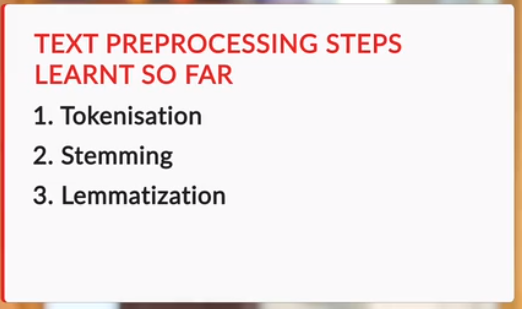

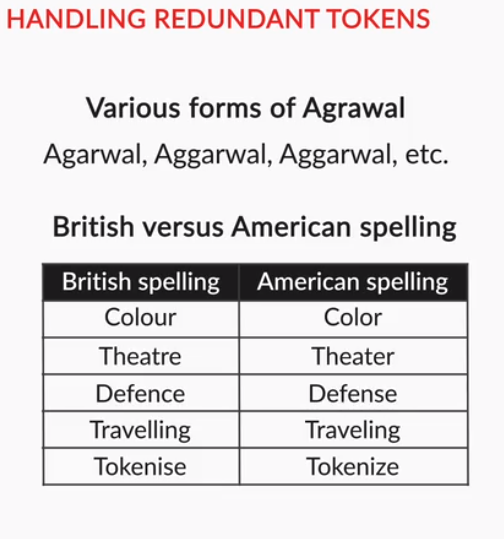
 

A similar problem is that of pronunciation which has to do with different dialects present in the same language. For example, the word ‘colour’ is used in British English, while ‘color’ is used in American English. Both are correct spellings, but they have the exact same problem -  ‘colouring’ and ‘coloring’ will result in different stems and lemma.

 

To deal with different spellings that occur due to different pronunciations, you’ll learn the concept of phonetic hashing which will help you canonicalise different versions of the same word to a base word.

 

In the next section, you’ll learn about phonetic hashing and how to use it to canonicalise words that have different spellings due to different pronunciations.

## Phonetic Hashing
There are certain words which have different pronunciations in different languages. As a result, they end up being spelt differently. Examples of such words include names of people, city names, names of dishes, etc. Take, for example, the capital of India - New Delhi. Delhi is also pronounced as Dilli in Hindi. Hence, it is not surprising to find both variants in an uncleaned text corpus. Similarly, the surname ‘Agrawal’ has various spellings and pronunciations. Performing stemming or lemmatization to these words will not help us as much because the problem of redundant tokens will still be present. Hence, we need to reduce all the variations of a particular word to a common word.

 

To achieve this, you’ll need to know about what is called as the phonetic hashing technique.

 

Phonetic hashing buckets all the similar phonemes (words with similar sound or pronunciation) into a single bucket and gives all these variations a single hash code. Hence, the word ‘Dilli’ and ‘Delhi’ will have the same code.

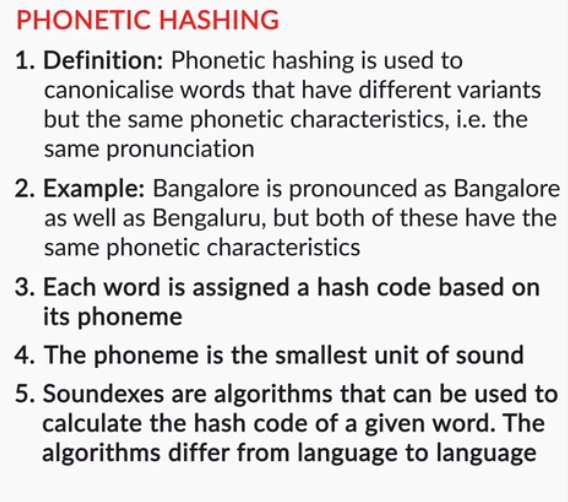

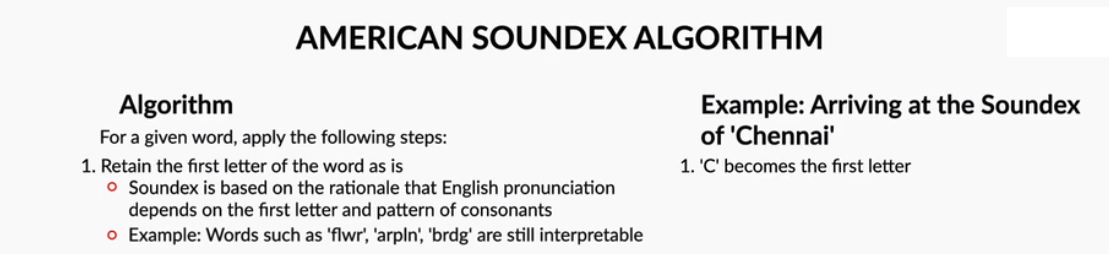
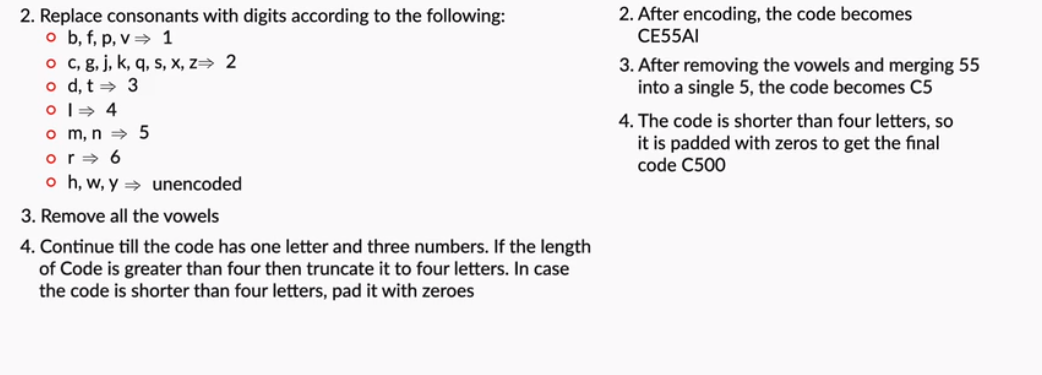

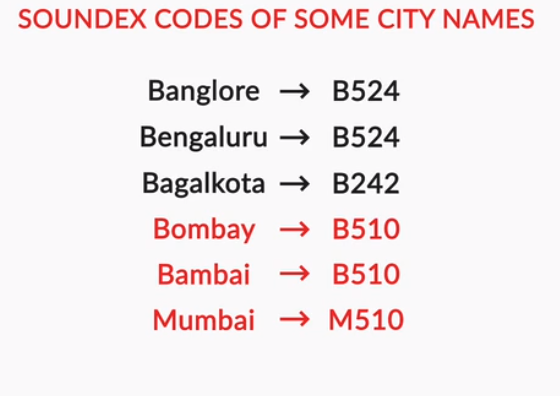



Phonetic hashing is done using the Soundex algorithm. American Soundex is the most popular Soundex algorithm. It buckets British and American spellings of a word to a common code. It doesn't matter which language the input word comes from - as long as the words sound similar, they will get the same hash code.

 

Now, let’s arrive at the Soundex of the word ‘Mississippi’. To calculate the hash code, you’ll make changes to the same word, in-place, as follows:

Phonetic hashing is a four-letter code. The first letter of the code is the first letter of the input word. Hence it is retained as is. The first character of the phonetic hash is ‘M’. Now, we need to make changes to the rest of the letters of the word.

Now, we need to map all the consonant letters (except the first letter). All the vowels are written as is and ‘H’s, ‘Y’s and ‘W’s remain unencoded (unencoded means they are removed from the word). After mapping the consonants, the code becomes MI22I22I11I.

The third step is to remove all the vowels. ‘I’ is the only vowel. After removing all the ‘I’s, we get the code M222211. Now, you would need to merge all the consecutive duplicate numbers into a single unique number. All the ‘2’s are merged into a single ‘2’. Similarly, all the ‘1’s are merged into a single ‘1’. The code that we get is M21.

The fourth step is to force the code to make it a four-letter code. You either need to pad it with zeroes in case it is less than four characters in length. Or you need to truncate it from the right side in case it is more than four characters in length. Since the code is less than four characters in length, you’ll pad it with one ‘0’ at the end. The final code is M210.

Since the process is fixed, we can simply create a function to create a Soundex code of any given input word. Learn how to make such function from professor Srinath as he explains this with a Jupyter notebook. Download the Jupyter notebook from the link given below to follow along

## Soundex

###### Let's create a function which calculates the soundex of any given string

In [1]:
def get_soundex(token):
    """Get the soundex code for the string"""
    token = token.upper()
    soundex = ""
    
    # first letter of input is always the first letter of soundex
    soundex += token[0]
    
    # create a dictionary which maps letters to respective soundex codes. Vowels and 'H', 'W' and 'Y' will be represented by '.'
    dictionary = {"BFPV": "1", "CGJKQSXZ":"2", "DT":"3", "L":"4", "MN":"5", "R":"6", "AEIOUHWY":"."}

    for char in token[1:]:
        for key in dictionary.keys():
            if char in key:
                code = dictionary[key]
                if code != soundex[-1]:
                    soundex += code

    # remove vowels and 'H', 'W' and 'Y' from soundex
    soundex = soundex.replace(".", "")
    
    # trim or pad to make soundex a 4-character code
    soundex = soundex[:4].ljust(4, "0")
        
    return soundex

### Let's see what's the soudex of 'Bombay' and 'Bambai'

In [11]:
print(get_soundex("hathway"))
print(get_soundex("hetway"))

H300
H300


### Let's see soundex of 'Aggrawal', 'Agrawal', 'Aggarwal' and 'Agarwal'

In [12]:
print(get_soundex("Aggrawal"))
print(get_soundex("Agrawal"))
print(get_soundex("Aggarwal"))
print(get_soundex("Agarwal"))

A264
A264
A264
A264


Up next, you’ll learn how to identify and measure the 'distance between words' using the concept of edit distance which will help you build your own spell corrector.

### Edit Distance
 

In the last section, you saw how to deal with different pronunciations of a particular word. Next, you’ll learn how to deal with misspellings. As already discussed, misspellings need to be corrected in order to stem or lemmatize efficiently. The problem of misspellings is so common these days, especially in text data from social media, that it makes working with text extremely difficult, if not dealt with.

 

Now, to handle misspellings, you’ll learn how to make a spell corrector. All the misspelt words will be corrected to the correct spelling. In other words, all the misspelt words will be canonicalised to the base form, which is the correct spelling of that word. But to really understand how a spell corrector works, you’ll need to understand the concept of edit distance.

 

An edit distance is a distance between two strings which is a non-negative integer number. Professor Baba explains the concept of edit distance in the following lecture.

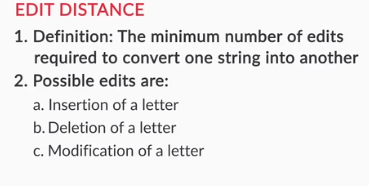

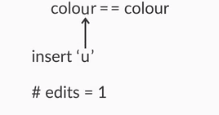
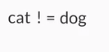
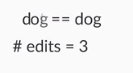

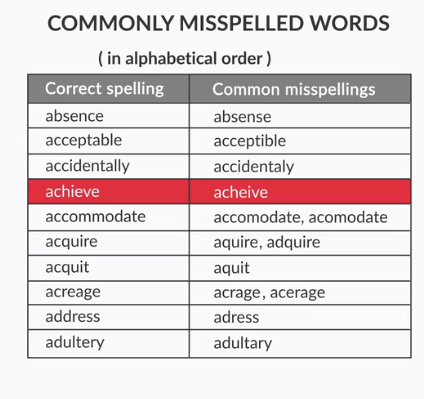

As you just learnt, an edit distance is the number of edits that are needed to convert a source string to a target string.

 

Now, the question that comes to the mind is - what’s an edit? An edit operation can be one of the following:

Insertion of a letter in the source string. To convert ‘color’ to ‘colour’, you need to insert the letter ‘u’ in the source string.

Deletion of a letter from the source string. To convert ‘Matt’ to ‘Mat’, you need to delete one of the ‘t’s from the source string.

Substitution of a letter in the source string. To convert ‘Iran’ to ‘Iraq’, you need to substitute ‘n’ with ‘q’

Now, it is easy to tell the edit distance between two relatively small strings. You can probably tell the number of edits that are needed in the string ‘applaud’ to ‘apple’. Did you guess how many? You need three edits. Substitution of ‘a’ to ‘e’ in a single edit. Then you require two deletions - deletion of the letters ‘u’ and ‘d’. Hence, you need a total of three edit operations in this case. But, this was a fairly simple example. It would become difficult when the two strings are relatively large and complex. Try calculating the edit distance between ‘deleterious’ and ‘deletion’. It’s not obvious in the first look. Hence, we need to learn how to calculate edit distance between any two given strings, however long and complex they might be.

 

More importantly, we need an algorithm to compute the edit distance between two words. Professor Srinath explains such an algorithm in the following lecture.

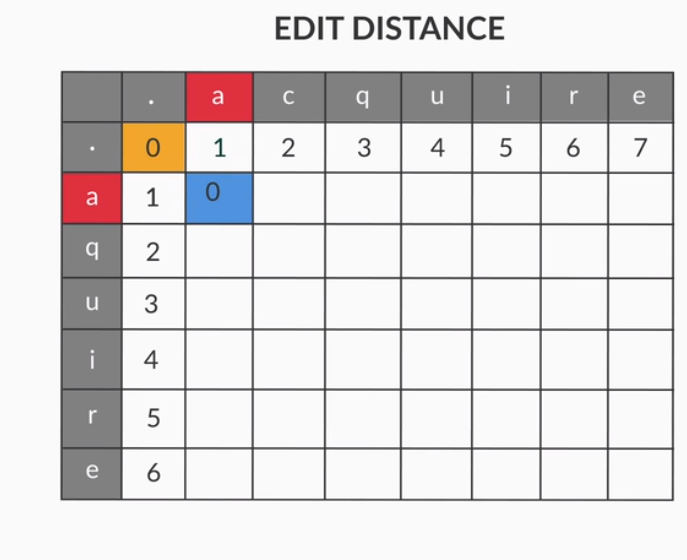

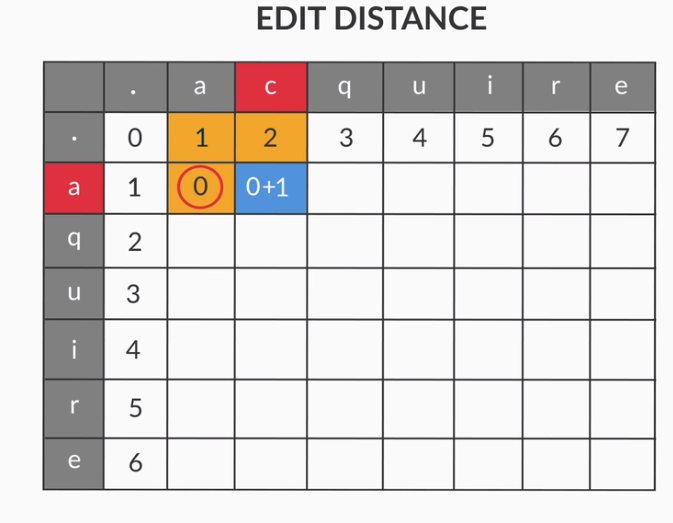

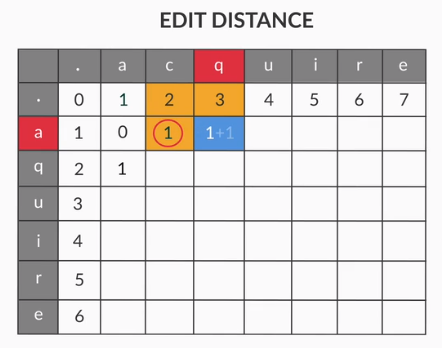

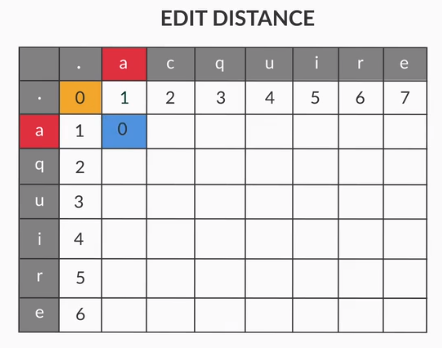

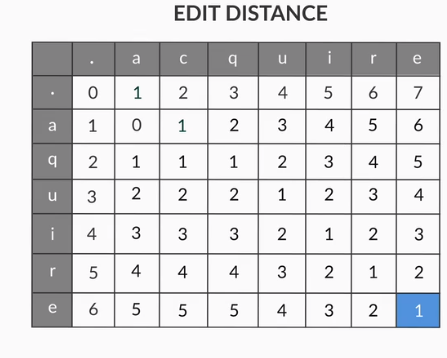

sp the Edit distance between acquire and aquire is " 1 "

So, that’s how the Levenshtein edit distance is calculated. Now, attempt the following exercise to practice and strengthen the concept of edit distance.

### Levenshtein Edit Distance
The levenshtein distance calculates the number of steps (insertions, deletions or substitutions) required to go from source string to target string.

In [13]:
def lev_distance(source='', target=''):
    """Make a Levenshtein Distances Matrix"""
    
    # get length of both strings
    n1, n2 = len(source), len(target)
    
    # create matrix using length of both strings - source string sits on columns, target string sits on rows
    matrix = [ [ 0 for i1 in range(n1 + 1) ] for i2 in range(n2 + 1) ]
    
    # fill the first row - (0 to n1-1)
    for i1 in range(1, n1 + 1):
        matrix[0][i1] = i1
    
    # fill the first column - (0 to n2-1)
    for i2 in range(1, n2 + 1):
        matrix[i2][0] = i2
    
    # fill the matrix
    for i2 in range(1, n2 + 1):
        for i1 in range(1, n1 + 1):
            
            # check whether letters being compared are same
            if (source[i1-1] == target[i2-1]):
                value = matrix[i2-1][i1-1]               # top-left cell value
            else:
                value = min(matrix[i2-1][i1]   + 1,      # left cell value     + 1
                            matrix[i2][i1-1]   + 1,      # top cell  value     + 1
                            matrix[i2-1][i1-1] + 1)      # top-left cell value + 1
            
            matrix[i2][i1] = value
    
    # return bottom-right cell value
    return matrix[-1][-1]

In [14]:
lev_distance('Mountain', 'Mount')

3

### Levenshtein distance in nltk library

In [15]:
# import library
from nltk.metrics.distance import edit_distance

In [18]:
edit_distance("perspective", "prospective")

2

In [19]:
edit_distance('apple','appel')

2

In [23]:
edit_distance('appeal','apple')

3

### Damerau-Levenshtein Distance
The Damerau-Levenshtein distance allows transpositions (swap of two letters which are adjacent to each other) as well.

In [16]:
edit_distance("apple", "appel", transpositions=False, )

2

In [24]:
edit_distance("apple", "appel", transpositions=True, )

1

In [44]:
print(get_soundex('appel'))
print(get_soundex('apple'))

A140
A140


So that’s how you compute the edit distance between two given strings. You also saw another variation of the edit distance - the Damerau–Levenshtein distance. The Damerau–Levenshtein distance, apart from allowing the three edit operations, also allows the swap (transposition) operation between two adjacent characters which costs only one edit instead of two.

 

This edit operation was introduced because swapping is a very common mistake. For example, while typing, people mistype ‘relief’ to ‘releif’. This has to be accounted as a single mistake (one edit distance), not two.

 

But how to make a spell corrector which was the main objective in the first place? You’ll learn to do that in the next section.

## Spell Corrector - I
 

A spell corrector is a widely used application that you would see almost everywhere on the internet. If you have the autocorrect feature enabled on your phone, the incorrect spellings get replaced by the correct ones. Another example is when you use a search engine such as Google to search anything and mistype a word, it suggests the correct word.

 

Spell correction is an important part of lexical processing. In many applications, spell correction forms an initial preprocessing layer. For example, if you are making a chatbot to book flights, and you get the user request 'Book a flight from Mumbai to Bangalor', you want to gracefully handle that spelling error and return relevant results.

 

Now, people have made various attempts to make spell correctors using different techniques. Some are very basic and elementary which use lexical processing, while others are state-of-the-art performers which use deep learning architectures.

 

Here, you’re going to learn the Norvig’s spell corrector which gives you really good performance and result, given its simplicity. Watch the following video where Baba explains how to build a Norvig spell corrector.

In [25]:
import re
from collections import Counter

# function to tokenise words
def words(document):
    "Convert text to lower case and tokenise the document"
    return re.findall(r'\w+', document.lower())



In [46]:
# create a frequency table of all the words of the document
all_words = Counter(words(open('Data/big.txt').read()))

In [35]:
# check frequency of a random word, say, 'chair'
all_words['chair']

135

In [36]:
# look at top 10 frequent words
all_words.most_common(10)

[('the', 79809),
 ('of', 40024),
 ('and', 38312),
 ('to', 28765),
 ('in', 22023),
 ('a', 21124),
 ('that', 12512),
 ('he', 12401),
 ('was', 11410),
 ('it', 10681)]

In [37]:
def edits_one(word):
    "Create all edits that are one edit away from `word`."
    alphabets    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])                   for i in range(len(word) + 1)]
    deletes    = [left + right[1:]                       for left, right in splits if right]
    inserts    = [left + c + right                       for left, right in splits for c in alphabets]
    replaces   = [left + c + right[1:]                   for left, right in splits if right for c in alphabets]
    transposes = [left + right[1] + right[0] + right[2:] for left, right in splits if len(right)>1]
    return set(deletes + inserts + replaces + transposes)

In [38]:
def edits_two(word):
    "Create all edits that are two edits away from `word`."
    return (e2 for e1 in edits_one(word) for e2 in edits_one(e1))

In [39]:
edits_two('chair')

<generator object edits_two.<locals>.<genexpr> at 0x000001B14F5589E8>

In [40]:
def known(words):
    "The subset of `words` that appear in the `all_words`."
    return set(word for word in words if word in all_words)

In [41]:
def possible_corrections(word):
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits_one(word)) or known(edits_two(word)) or [word])

In [44]:
print(edits_one('appel'))

{'amppel', 'appelb', 'sappel', 'appfel', 'appelv', 'apjel', 'aopel', 'appwel', 'axppel', 'appeel', 'apple', 'uappel', 'appexl', 'aappel', 'appeml', 'apppl', 'gappel', 'appef', 'appej', 'appql', 'apiel', 'appael', 'apprel', 'appehl', 'appenl', 'ampel', 'apxel', 'apped', 'appela', 'apcpel', 'apqpel', 'papel', 'aqppel', 'apphl', 'hppel', 'appeo', 'anppel', 'fappel', 'appefl', 'appelx', 'tppel', 'yappel', 'adppel', 'agppel', 'aoppel', 'apbel', 'bappel', 'appgl', 'appkel', 'appcel', 'appvel', 'appdl', 'appeil', 'appl', 'appelm', 'applel', 'apkpel', 'aplel', 'appem', 'appjel', 'appesl', 'appeal', 'jppel', 'aapel', 'apptl', 'aypel', 'appelo', 'bppel', 'dppel', 'zppel', 'alppel', 'arpel', 'appbel', 'awpel', 'apopel', 'lappel', 'eappel', 'apgpel', 'nppel', 'appsl', 'appzl', 'appul', 'appeli', 'appee', 'oppel', 'aplpel', 'appetl', 'aprel', 'apwel', 'qppel', 'appjl', 'aipel', 'zappel', 'nappel', 'aphpel', 'rappel', 'apzpel', 'apuel', 'appoel', 'appelz', 'avppel', 'xppel', 'apkel', 'appvl', 'apper

In [47]:
print(possible_corrections('appel'))

{'axpel', 'apple', 'appeal'}


In [43]:
print(get_soundex('apple'))
print(get_soundex('appeal'))
print(get_soundex('appel'))

A140
A140
A140


In [52]:
def prob(word, N=sum(all_words.values())): 
    "Probability of `word`: Number of appearances of 'word' / total number of tokens"
    return all_words[word] / N

In [53]:
print(len(set(edits_one("monney"))))
print(edits_one("monney"))

336
{'mknney', 'monneyp', 'monneyu', 'mhnney', 'mornney', 'mjnney', 'mxnney', 'monnzy', 'monneg', 'monneu', 'mdnney', 'moqney', 'monjey', 'mownney', 'monnel', 'monwey', 'monndy', 'monntey', 'monnpey', 'mlonney', 'monnsy', 'monnmey', 'monneyx', 'muonney', 'moknney', 'moznney', 'xonney', 'monmney', 'moyney', 'monnepy', 'fonney', 'monpey', 'monwney', 'cmonney', 'moneey', 'monnep', 'monnewy', 'monkey', 'mnnney', 'monnqy', 'mwnney', 'monnej', 'mondney', 'jmonney', 'monneyt', 'mosney', 'monnbey', 'mponney', 'mynney', 'monnesy', 'pmonney', 'gonney', 'momney', 'monnky', 'monneyv', 'mxonney', 'molnney', 'tmonney', 'monnsey', 'mvnney', 'monneh', 'nmonney', 'emonney', 'modnney', 'moxnney', 'monnaey', 'monhney', 'lonney', 'msnney', 'monsney', 'moenney', 'monndey', 'monnee', 'monnev', 'monley', 'monnevy', 'monneya', 'monnny', 'monneyc', 'mondey', 'monnehy', 'monnec', 'conney', 'munney', 'hmonney', 'monniy', 'monnty', 'mofney', 'monlney', 'monnety', 'monnyy', 'monnxy', 'monnrey', 'monneyq', 'monuney

In [28]:
print(known(edits_one("monney")))

{'monkey', 'money'}


In [41]:
print(get_soundex("monney"))
print(get_soundex("money"))
print(get_soundex("monkey"))

M500
M500
M520


In [49]:
# Let's look at words that are two edits away
print(len(set(edits_two("emfasize"))))
print(known(edits_two("emfasize")))
print(known(edits_one("monney")))

90902
{'emphasize'}
{'monkey', 'money'}


In [30]:
# Let's look at possible corrections of a word
print(possible_corrections("emfasize"))

{'emphasize'}


In [31]:
# Let's look at probability of a word
print(prob("money"))
print(prob("monkey"))

0.0002922233626303688
5.378344097491451e-06


In [56]:
def spell_check(word):
    "Print the most probable spelling correction for `word` out of all the `possible_corrections`"
    correct_word = max(possible_corrections(word), key=prob)
    if correct_word != word:
        return "Did you mean " + correct_word + "?"
    else:
        return "Correct spelling."

In [59]:
# test spell check
print(spell_check("lol"))

Did you mean ll?


Now, let’s look at what each function does. The function words() is pretty straightforward. It tokenises any document that’s passed to it. You have already learnt how to tokenise words using NLTK library. You could also use regular expressions to tokenise words. The ‘Counter’ class, which you just saw in the Jupyter notebook, creates a frequency distribution of the words present in the seed document. Each word is stored along with its count in a Python dictionary format. You could also use the NLTK’s FreqDist() function to achieve the same results. It’s just that there are more than one way to do things in Python. And it’s always nice to know more than one way to perform the same task.

 

Now, the seed document ‘big.txt’ is nothing but a book. It’s the book ‘The Adventures of Sherlock Holmes’ present in text format at project Gutenberg’s website. A seed document acts like a lookup dictionary for a spell corrector since it contains the correct spellings of each word.

 

Now, you might ask why not just use a dictionary instead of a book? You’ll get to know why we’re using a book a little later. Now, in the next part, Baba demonstrates the use of edit distance in the spell corrector.

You just saw two functions. The edits_one() function and the edits_two() function. The edits_one() function creates all the possible words that are one edit distance away from the input word. Most of the words that this function creates are garbage, i.e. they are not valid English words. For example, if you pass the word ‘laern’ (misspelling of the word ‘learn’) to edits_one(), it will create a list where the word ‘lgern’ will be present since it is an edit away from the word ‘laern’. But it’s not an English word. Only a subset of the words will be actual English words.

 

Similarly, the edits_two() function creates a list of all the possible words that are two edits away from the input word. Most of these words will also be garbage.

 

In the video present below, you will see how to filter out the valid English words from these lists by creating a separate function called ‘known()’ to do so.

The known() function filters out the valid English word from a list of given words. It uses the frequency distribution as a dictionary that was created using the seed document. If the words created using edits_one() and edits_two() are not in the dictionary, they’re discarded.

 

Now, the function possible_corrections() returns a list of all the potential words that can be the correct alternative spelling. For example, let’s say the user has typed the word ‘wut’ which is wrong. There are multiple words that could be the correct spelling of this word such as ‘cut’, ‘but’, ‘gut’, etc. This functions will return all these words for the given incorrect word ‘wut’. But, how does this function find all these word suggestions exactly? It works as follows:

It first checks if the word is correct or not, i.e. if the word typed by the user is a present in the dictionary or not. If the word is present, it returns no spelling suggestions since it is already a correct dictionary word.

If the user types a word which is not a dictionary word, then it creates a list of all the known words that are one edit distance away. If there are no valid words in the list created by edits_one() only then this function fetches a list of all known words that are two edits away from the input word

If there are no known words that are two edits away, then the function returns the  original input word. This means that there are no alternatives that the spell corrector could find. Hence, it simply returns the original word.

Finally, there is the prob() function. The function returns the probability of an input word. This is exactly why you need a seed document instead of a dictionary. A dictionary only contains a list of all correct English words. But, a seed document not only contains all the correct words but it could also be used to create a frequency distribution of all these words. This frequency will be taken into consideration when there are more than one possibly correct words for a given misspelled word. Let’s say the user has input the word ‘wut’. The correct alternative to this word could be one of these words - ‘cut’, ‘but’ and ‘gut’, etc. The possible_corrections() function will return all these words. But the prob() function will create a probably associated with each of these suggestions and return the one with highest probability. Suppose, if a word ‘but’ is present 2000 times out of a total of million words in the seed document, then it’s probability would be 2000/1000000, i.e. 0.002.

In [61]:
from spell_corrector import rectify
correct = rectify("appel")
print(correct)

appeal


## Pointwise Mutual Information - I
 

Till now you have learnt about reducing words to their base form. But there is another common scenario that you’ll encounter while working with text. Suppose there is an article titled “Higher Technical Education in India” which talks about the state of Indian education system in engineering space. Let’s say, it contains names of various Indian colleges such as ‘International Institute of Information Technology, Bangalore’, ‘Indian Institute of Technology, Mumbai’, ‘National Institute of Technology, Kurukshetra’ and many other colleges. Now, when you tokenise this document, all these college names will be broken into individual words such as ‘Indian’, ‘Institute’, ‘International’, ‘National’, ‘Technology’ and so on. But you don’t want this. You want an entire college name to be represented by one token.

 

To solve this issue, you could either replace these college names by a single term. So, ‘International Institute of Information Technology, Bangalore’ could be replaced by ‘IIITB’. But this seems like a really manual process. To replace words in such manner, you would need to read the entire corpus and look for such terms.

 

Turns out that there is a metric called the pointwise mutual information, also called the PMI. You can calculate the PMI score of each of these terms. PMI score of terms such as ‘International Institute of Information Technology, Bangalore’ will be much higher than other terms. If the PMI score is more than a certain threshold than you can choose to replace these terms with a single term such as ‘International_Institute_of_Information_Technology_Bangalore’.

 

But what is PMI and how is it calculated? In the following video, professor ME explains PMI

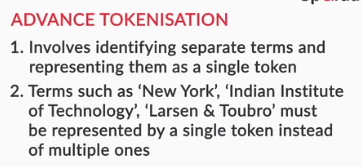
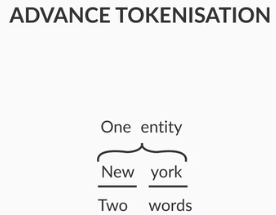
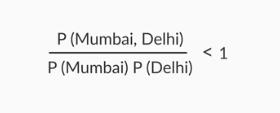
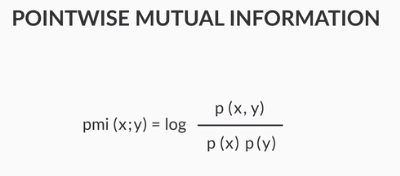
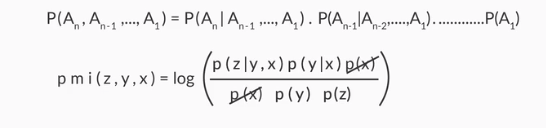
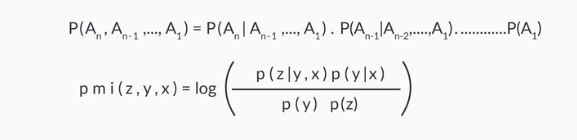


You saw how to calculate PMI of a term that has two words. The PMI score for such term is:

 

PMI(x, y) = log ( P(x, y)/P(x)P(y) )

 

For terms with three words, the formula becomes:

 

PMI(z, y, x) = log [(P(z,y,x))/(P(z)P(y)P(x))]

                                                     = log [(P(z|y, x)*P(y|x))*P(x)/(P(z)P(y)P(x))]

                                   = log [(P(z|y, x)*P(y|x))/([P(z)P(y))]

 

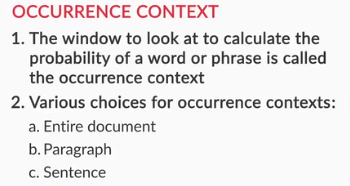
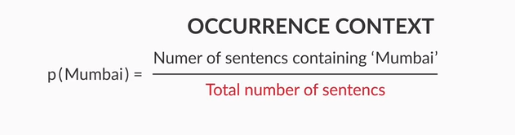
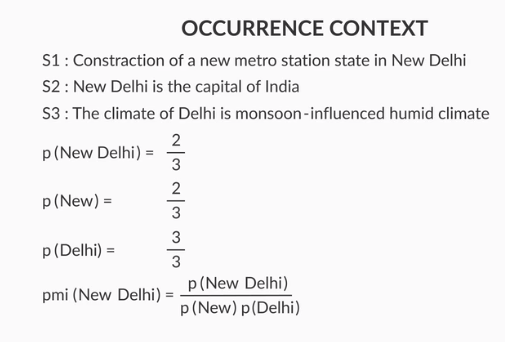

Till now, to calculate the probability of your word you chose words as the occurrence context. But you could also choose a sentence or even a paragraph as the occurrence context.

 

If we choose words as the occurrence context, then the probability of a word is:

P(w) = Number of times given word ‘w’ appears in the text corpus/ Total number of words in the corpus

 

Similarly, if a sentence is the occurrence context, then the probability of a word is given by:

P(w) = Number of sentences that contain ‘w’ / Total number of sentences in the corpus

 

Similarly, you could calculate the probability of a word with paragraphs as occurrence context.

 

Once you have the probabilities, you can simply plug in the values and have the PMI score.

 

Now, you’re given the following corpus of text:

“The Nobel Prize is a set of five annual international awards bestowed in several categories by Swedish and Norwegian institutions in recognition of academic, cultural, or scientific advances. In the 19th century, the Nobel family who were known for their innovations to the oil industry in Azerbaijan was the leading representative of foreign capital in Baku. The Nobel Prize was funded by personal fortune of Alfred Nobel. The Board of the Nobel Foundation decided that after this addition, it would allow no further new prize.”


Consider the above corpus to answer the questions of the following exercise. Take each sentence of the corpus as the occurrence context, and attempt the following exercise.
 

-0.176

PMI(Nobel Prize) = log10(p(Nobel Prize)/(p(nobel)p(prize))). 

Plugging in the values of p(Nobel Prize) as 0.5, p(nobel) as 1 and p(prize) as 0.75, you’ll get log10(0.67), i.e. -0.176 as the final PMI score.

## Pointwise Mutual Information - II
Now, calculating PMI score for a two-word term was pretty straightforward. But when you try to calculate the PMI of a three-word term such as “Indian Institute of Technology”, you will have to calculate P(Indian Institute Technology). To calculate such probability, you need to apply the chain rule of probability.

 

Professor Me explains the chain rule in the following video.

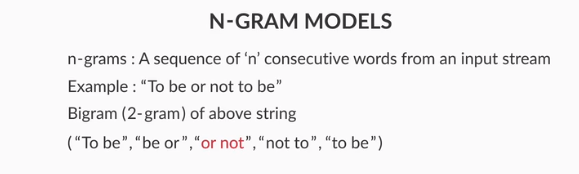
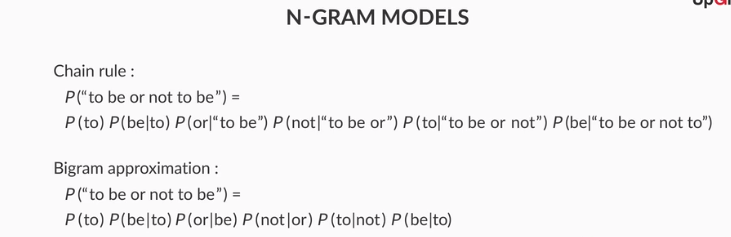

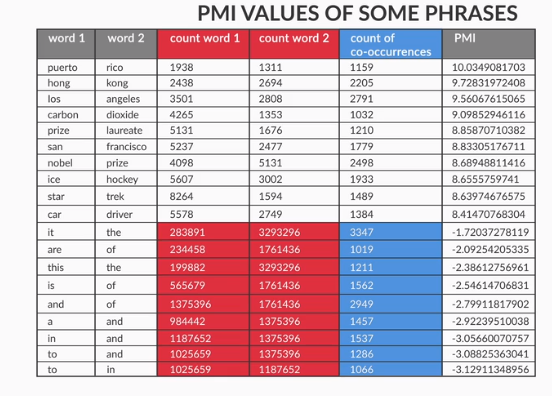

In practical settings, calculating PMI for terms whose length is more than two is still very costly for any relatively large corpus of text. You can either go for calculating it only for a two-word term or choose to skip it if you know that there are only a few occurrences of such terms.

 

After calculating the PMI score, you can compare it with a cutoff value and see if PMI is larger or smaller than the cutoff value. A good cutoff value is zero. Terms with PMI larger than zero are valid terms, i.e. they don’t need to be tokenised into different words. You can replace these terms with a single-word term that has an underscore present between different words of the term. For example, the term ‘New Delhi’ has a PMI greater than zero. It can be replaced with ‘New_Delhi’. This way, it won’t be tokenised while using the NLTK tokeniser.

 

This brings us to the end of the session. In the next section, you’ll go through a quick summary of this session

## Summary

In this session, you learnt about how to deal with three scenarios:

Handling differently spelt words due to different pronunciations

Correcting spelling of misspelt words using edit distance

Tokenising terms that comprise of multiple words

 

To handle words that have different spellings due to different pronunciations, you learnt the concept of phonetic hashing. Phonetic hashing is used to bucket words with similar pronunciation to the same hash code. To hash words, you used the Soundex algorithm. The American Soundex algorithm maps the letters of a word in such a way that words are reduced to a four-character long code. Words with the same Soundex code can be replaced by a common spelling of the word. This way, you learnt how to get rid of different variations in spellings of a word.

 

The next thing that you learnt about was the Levenshtein edit distance and spell corrector. You learnt that an edit distance is the number of edits that are needed to convert a source string to a target string. In a single edit operation, you can either insert, delete or substitute a letter. You also learnt a different variant of edit distance - the Damerau–Levenshtein distance. It lets you swap two adjacent letters in a single edit operation.

 

With the help of the edit distance, you created a spell corrector. You could use that spell corrector to rectify the spelling of incorrect words in your corpus.

 

Lastly, you learnt about the pointwise mutual information (PMI) score. You saw how you can calculate PMI of terms with two or more words. You learnt about the concept of occurrence context. After choosing the occurrence context, you can calculate the PMI of a term and choose whether it is a valid term or not based on the cutoff value. A good cutoff value is zero. Terms that have PMI higher than zero can be replaced by a single term by simply attaching the multiple words using an underscore.

In [66]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

In [2]:
tokens = ''' Additional editing by Jose Menendez)

New York
New York
New York
New York
New York
New York
New York
New York
New York
New York

New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York

New York
New York
New York
New York
New York
New York
New York

New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York

New York
New York
New York
New York
New York




THE ADVENTURES OF
SHERLOCK HOLMES

BY

SIR ARTHUR CONAN DOYLE

CONTENTS

I.	A Scandal in Bohemia
II.	The Red-Headed League
III.	A Case of Identity
IV.	The Boscombe Valley Mystery
V.	The Five Orange Pips
VI.	The Man with the Twisted Lip
VII.	The Adventure of the Blue Carbuncle
VIII.	The Adventure of the Speckled Band
IX.	The Adventure of the Engineer's Thumb
X.	The Adventure of the Noble Bachelor
XI.	The Adventure of the Beryl Coronet
XII.	The Adventure of the Copper Beeches


ADVENTURE  I.  A SCANDAL IN BOHEMIA

I.


To Sherlock Holmes she is always the woman. I have seldom heard him mention her under any other name. In his eyes she eclipses and predominates the whole of her sex. It was not that he felt any emotion akin to love for Irene Adler. All emotions, and that one particularly, were abhorrent to his cold, precise but admirably balanced mind. He was, I take it, the most perfect reasoning and observing machine that the world has seen, but as a lover he would have placed himself in a false position. He never spoke of the softer passions, save with a gibe and a sneer. They were admirable things for the observer--excellent for drawing the veil from men's motives and actions. But for the trained reasoner to admit such intrusions into his own delicate and finely adjusted temperament was to introduce a distracting factor which might throw a doubt upon all his mental results. Grit in a sensitive instrument, or a crack in one of his own high-power lenses, would not be more disturbing than a strong emotion in a nature such as his. And yet there was but one woman to him, and that woman was the late Irene Adler, of dubious and questionable memory.

I had seen little of Holmes lately. My marriage had drifted us away from each other. My own complete happiness, and the home-centred interests which rise up around the man who first finds himself master of his own establishment, were sufficient to absorb all my attention, while Holmes, who loathed every form of society with his whole Bohemian soul, remained in our lodgings in Baker Street, buried among his old books, and alternating from week to week between cocaine and ambition, the drowsiness of the drug, and the fierce energy of his own keen nature. He was still, as ever, deeply attracted by the study of crime, and occupied his immense faculties and extraordinary powers of observation in following out those clues, and clearing up those mysteries which had been abandoned as hopeless by the official police. From time to time I heard some vague account of his doings: of his summons to Odessa in the case of the Trepoff murder, of his clearing up of the singular tragedy of the Atkinson brothers at Trincomalee, and finally of the mission which he had accomplished so delicately and successfully for the reigning family of Holland. Beyond these signs of his activity, however, which I merely shared with all the readers of the daily press, I knew little of my former friend and companion.

One night--it was on the twentieth of March, 1888--I was returning from a journey to a patient (for I had now returned to civil practice), when my way led me through Baker Street. As I passed the well-remembered door, which must always be associated in my mind with my wooing, and with the dark incidents of the Study in Scarlet, I was seized with a keen desire to see Holmes again, and to know how he was employing his extraordinary powers. His rooms were brilliantly lit, and, even as I looked up, I saw his tall, spare figure pass twice in a dark silhouette against the blind. He was pacing the room swiftly, eagerly, with his head sunk upon his chest and his hands clasped behind him. To me, who knew his every mood and habit, his attitude and manner told their own story. He was at work again. He had risen out of his drug-created dreams and was hot upon the scent of some new problem. I rang the bell and was shown up to the chamber which had formerly been in part my own.

His manner was not effusive. It seldom was; but he was glad, I think, to see me. With hardly a word spoken, but with a kindly eye, he waved me to an armchair, threw across his case of cigars, and indicated a spirit case and a gasogene in the corner. Then he stood before the fire and looked me over in his singular introspective fashion.

"Wedlock suits you," he remarked. "I think, Watson, that you have put on seven and a half pounds since I saw you."

"Seven!" I answered.

"Indeed, I should have thought a little more. Just a trifle more, I fancy, Watson. And in practice again, I observe. You did not tell me that you intended to go into harness."

"Then, how do you know?"

"I see it, I deduce it. How do I know that you have been getting yourself very wet lately, and that you have a most clumsy and careless servant girl?"

"My dear Holmes," said I, "this is too much. You would certainly have been burned, had you lived a few centuries ago. It is true that I had a country walk on Thursday and came home in a dreadful mess, but as I have changed my clothes I can't imagine how you deduce it. As to Mary Jane, she is incorrigible, and my wife has given her notice, but there, again, I fail to see how you work it out."

He chuckled to himself and rubbed his long, nervous hands together.

"It is simplicity itself," said he; "my eyes tell me that on the inside of your left shoe, just where the firelight strikes it, the leather is scored by six almost parallel cuts. Obviously they have been caused by someone who has very carelessly scraped round the edges of the sole in order to remove crusted mud from it. Hence, you see, my double deduction that you had been out in vile weather, and that you had a particularly malignant boot-slitting specimen of the London slavey. As to your practice, if a gentleman walks into my rooms smelling of iodoform, with a black mark of nitrate of silver upon his right forefinger, and a bulge on the right side of his top-hat to show where he has secreted his stethoscope, I must be dull, indeed, if I do not pronounce him to be an active member of the medical profession."

I could not help laughing at the ease with which he explained his process of deduction. "When I hear you give your reasons," I remarked, "the thing always appears to me to be so ridiculously simple that I could easily do it myself, though at each successive instance of your reasoning I am baffled until you explain your process. And yet I believe that my eyes are as good as yours."

"Quite so," he answered, lighting a cigarette, and throwing himself down into an armchair. "You see, but you do not observe. The distinction is clear. For example, you have frequently seen the steps which lead up from the hall to this room."

"Frequently."

"How often?"

"Well, some hundreds of times."

"Then how many are there?"

"How many? I don't know."

"Quite so! You have not observed. And yet you have seen. That is just my point. Now, I know that there are seventeen steps, because I have both seen and observed. By the way, since you are interested in these little problems, and since you are good enough to chronicle one or two of my trifling experiences, you may be interested in this." He threw over a sheet of thick, pink-tinted notepaper which had been lying open upon the table. "It came by the last post," said he. "Read it aloud."

The note was undated, and without either signature or address.

"There will call upon you to-night, at a quarter to eight o'clock," it said, "a gentleman who desires to consult you upon a matter of the very deepest moment. Your recent services to one of the royal houses of Europe have shown that you are one who may safely be trusted with matters which are of an importance which can hardly be exaggerated. This account of you we have from all quarters received. Be in your chamber then at that hour, and do not take it amiss if your visitor wear a mask."

"This is indeed a mystery," I remarked. "What do you imagine that it means?"

"I have no data yet. It is a capital mistake to theorise before one has data. Insensibly one begins to twist facts to suit theories, instead of theories to suit facts. But the note itself. What do you deduce from it?"

I carefully examined the writing, and the paper upon which it was written.

"The man who wrote it was presumably well to do," I remarked, endeavouring to imitate my companion's processes. "Such paper could not be bought under half a crown a packet. It is peculiarly strong and stiff."

"Peculiar--that is the very word," said Holmes. "It is not an English paper at all. Hold it up to the light."

I did so, and saw a large "E" with a small "g," a "P," and a large "G" with a small "t" woven into the texture of the paper.

"What do you make of that?" asked Holmes.

"The name of the maker, no doubt; or his monogram, rather."

"Not at all. The 'G' with the small 't' stands for 'Gesellschaft,' which is the German for 'Company.' It is a customary contraction like our 'Co.' 'P,' of course, stands for 'Papier.' Now for the 'Eg.' Let us glance at our Continental Gazetteer." He took down a heavy brown volume from his shelves. "Eglow, Eglonitz--here we are, Egria. It is in a German-speaking country--in Bohemia, not far from Carlsbad. 'Remarkable as being the scene of the death of Wallenstein, and for its numerous glass-factories and paper-mills.' Ha, ha, my boy, what do you make of that?" His eyes sparkled, and he sent up a great blue triumphant cloud from his cigarette.

"The paper was made in Bohemia," I said.

"Precisely. And the man who wrote the note is a German. Do you note the peculiar construction of the sentence--'This account of you we have from all quarters received.' A Frenchman or Russian could not have written that. It is the German who is so uncourteous to his verbs. It only remains, therefore, to discover what is wanted by this German who writes upon Bohemian paper and prefers wearing a mask to showing his face. And here he comes, if I am not mistaken, to resolve all our doubts."

As he spoke there was the sharp sound of horses' hoofs and grating wheels against the curb, followed by a sharp pull at the bell. Holmes whistled.

"A pair, by the sound," said he. "Yes," he continued, glancing out of the window. "A nice little brougham and a pair of beauties. A hundred and fifty guineas apiece. There's money in this case, Watson, if there is nothing else."

"I think that I had better go, Holmes."

"Not a bit, Doctor. Stay where you are. I am lost without my Boswell. And this promises to be interesting. It would be a pity to miss it."

"But your client--"

"Never mind him. I may want your help, and so may he. Here he comes. Sit down in that armchair, Doctor, and give us your best attention."

A slow and heavy step, which had been heard upon the stairs and in the passage, paused immediately outside the door. Then there was a loud and authoritative tap.

"Come in!" said Holmes.

A man entered who could hardly have been less than six feet six inches in height, with the chest and limbs of a Hercules. His dress was rich with a richness which would, in England, be looked upon as akin to bad taste. Heavy bands of astrakhan were slashed across the sleeves and fronts of his double-breasted coat, while the deep blue cloak which was thrown over his shoulders was lined with flame-coloured silk and secured at the neck with a brooch which consisted of a single flaming beryl. Boots which extended halfway up his calves, and which were trimmed at the tops with rich brown fur, completed the impression of barbaric opulence which was suggested by his whole appearance. He carried a broad-brimmed hat in his hand, while he wore across the upper part of his face, extending down past the cheekbones, a black vizard mask, which he had apparently adjusted that very moment, for his hand was still raised to it as he entered. From the lower part of the face he appeared to be a man of strong character, with a thick, hanging lip, and a long, straight chin suggestive of resolution pushed to the length of obstinacy.

"You had my note?" he asked with a deep harsh voice and a strongly marked German accent. "I told you that I would call." He looked from one to the other of us, as if uncertain which to address.

"Pray take a seat," said Holmes. "This is my friend and colleague, Dr. Watson, who is occasionally good enough to help me in my cases. Whom have I the honour to address?"

"You may address me as the Count Von Kramm, a Bohemian nobleman. I understand that this gentleman, your friend, is a man of honour and discretion, whom I may trust with a matter of the most extreme importance. If not, I should much prefer to communicate with you alone."

I rose to go, but Holmes caught me by the wrist and pushed me back into my chair. "It is both, or none," said he. "You may say before this gentleman anything which you may say to me."

The Count shrugged his broad shoulders. "Then I must begin," said he, "by binding you both to absolute secrecy for two years; at the end of that time the matter will be of no importance. At present it is not too much to say that it is of such weight it may have an influence upon European history."

"I promise," said Holmes.

"And I."

"You will excuse this mask," continued our strange visitor. "The august person who employs me wishes his agent to be unknown to you, and I may confess at once that the title by which I have just called myself is not exactly my own."

"I was aware of it," said Holmes dryly.

"The circumstances are of great delicacy, and every precaution has to be taken to quench what might grow to be an immense scandal and seriously compromise one of the reigning families of Europe. To speak plainly, the matter implicates the great House of Ormstein, hereditary kings of Bohemia."

"I was also aware of that," murmured Holmes, settling himself down in his armchair and closing his eyes.

Our visitor glanced with some apparent surprise at the languid, lounging figure of the man who had been no doubt depicted to him as the most incisive reasoner and most energetic agent in Europe. Holmes slowly reopened his eyes and looked impatiently at his gigantic client.

"If your Majesty would condescend to state your case," he remarked, "I should be better able to advise you."

The man sprang from his chair and paced up and down the room in uncontrollable agitation. Then, with a gesture of desperation, he tore the mask from his face and hurled it upon the ground. "You are right," he cried; "I am the King. Why should I attempt to conceal it?"

"Why, indeed?" murmured Holmes. "Your Majesty had not spoken before I was aware that I was addressing Wilhelm Gottsreich Sigismond von Ormstein, Grand Duke of Cassel-Felstein, and hereditary King of Bohemia."

"But you can understand," said our strange visitor, sitting down once more and passing his hand over his high white forehead, "you can understand that I am not accustomed to doing such business in my own person. Yet the matter was so delicate that I could not confide it to an agent without putting myself in his power. I have come incognito from Prague for the purpose of consulting you."

"Then, pray consult," said Holmes, shutting his eyes once more.

"The facts are briefly these: Some five years ago, during a lengthy visit to Warsaw, I made the acquaintance of the well-known adventuress, Irene Adler. The name is no doubt familiar to you."

"Kindly look her up in my index, Doctor," murmured Holmes without opening his eyes. For many years he had adopted a system of docketing all paragraphs concerning men and things, so that it was difficult to name a subject or a person on which he could not at once furnish information. In this case I found her biography sandwiched in between that of a Hebrew rabbi and that of a staff-commander who had written a monograph upon the deep-sea fishes.

"Let me see!" said Holmes. "Hum! Born in New Jersey in the year 1858. Contralto--hum! La Scala, hum! Prima donna Imperial Opera of Warsaw--yes! Retired from operatic stage--ha! Living in London--quite so! Your Majesty, as I understand, became entangled with this young person, wrote her some compromising letters, and is now desirous of getting those letters back."

"Precisely so. But how--"

"Was there a secret marriage?"

"None."

"No legal papers or certificates?"

"Indian Institute of Technology"

"None."

"Then I fail to follow your Majesty. If this young person should produce her letters for blackmailing or other purposes, how is she to prove their authenticity?"

"There is the writing."

"Pooh, pooh! Forgery."

"My private note-paper."

"Stolen."

"My own seal."

"Imitated."

"My photograph."

"Bought."

"We were both in the photograph."

"Oh, dear! That is very bad! Your Majesty has indeed committed an indiscretion."

"I was mad--insane."

"You have compromised yourself seriously."

"I was only Crown Prince then. I was young. I am but thirty now."

"It must be recovered."

"We have tried and failed."

"Your Majesty must pay. It must be bought."

"She will not sell."

"Stolen, then."

"Five attempts have been made. Twice burglars in my pay ransacked her house. Once we diverted her luggage when she travelled. Twice she has been waylaid. There has been no result."

"No sign of it?"

"Absolutely none."

"New york"

Holmes laughed. "It is quite a pretty little problem," said he.

"But a very serious one to me," returned the King reproachfully.

"Very, indeed. And what does she propose to do with the photograph?"

"To ruin me.
'''

tokens = word_tokenize(tokens)

In [89]:

bigrams = nltk.collocations.BigramAssocMeasures()
trigrams = nltk.collocations.TrigramAssocMeasures()

bigramFinder = nltk.collocations.BigramCollocationFinder.from_words(tokens)
trigramFinder = nltk.collocations.TrigramCollocationFinder.from_words(tokens)

In [95]:
dir(bigramFinder)

['N',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply_filter',
 '_build_new_documents',
 '_ngram_freqdist',
 '_score_ngrams',
 'above_score',
 'apply_freq_filter',
 'apply_ngram_filter',
 'apply_word_filter',
 'default_ws',
 'from_documents',
 'from_words',
 'nbest',
 'ngram_fd',
 'score_ngram',
 'score_ngrams',
 'window_size',
 'word_fd']

In [116]:
val = bigramFinder.nbest(bigrams.pmi,1200)

In [120]:
import nltk
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = BigramCollocationFinder.from_words( nltk.corpus.brown.tagged_words('ca01', tagset='universal'))
finder.nbest(bigram_measures.pmi, 5)

[(('1,119', 'NUM'), ('votes', 'NOUN')),
 (('1962', 'NUM'), ("governor's", 'NOUN')),
 (('637', 'NUM'), ('E.', 'NOUN')),
 (('Alpharetta', 'NOUN'), ('prison', 'NOUN')),
 (('Bar', 'NOUN'), ('Association', 'NOUN'))]

In [117]:
for i in val:
    if "New" in i:
        print(i)
    

('New', 'York')
('New', 'Jersey')
('New', 'york')


In [77]:
trigramFinder.nbest(bigrams.pmi,100)

[('ADVENTURES', 'OF', 'SHERLOCK'),
 ('ARTHUR', 'CONAN', 'DOYLE'),
 ('BY', 'SIR', 'ARTHUR'),
 ('Beryl', 'Coronet', 'XII'),
 ('Blue', 'Carbuncle', 'VIII'),
 ('Boscombe', 'Valley', 'Mystery'),
 ('CONAN', 'DOYLE', 'CONTENTS'),
 ('Copper', 'Beeches', 'ADVENTURE'),
 ('Gottsreich', 'Sigismond', 'von'),
 ('HOLMES', 'BY', 'SIR'),
 ('Noble', 'Bachelor', 'XI'),
 ('OF', 'SHERLOCK', 'HOLMES'),
 ('Orange', 'Pips', 'VI'),
 ('Prima', 'donna', 'Imperial'),
 ('Red-Headed', 'League', 'III'),
 ('SCANDAL', 'IN', 'BOHEMIA'),
 ('SHERLOCK', 'HOLMES', 'BY'),
 ('SIR', 'ARTHUR', 'CONAN'),
 ('Speckled', 'Band', 'IX'),
 ('THE', 'ADVENTURES', 'OF'),
 ('Twisted', 'Lip', 'VII'),
 ('Valley', 'Mystery', 'V.'),
 ('Wilhelm', 'Gottsreich', 'Sigismond'),
 ('addressing', 'Wilhelm', 'Gottsreich'),
 ('almost', 'parallel', 'cuts'),
 ('careless', 'servant', 'girl'),
 ('carelessly', 'scraped', 'round'),
 ('customary', 'contraction', 'like'),
 ('donna', 'Imperial', 'Opera'),
 ('fifty', 'guineas', 'apiece'),
 ('high', 'white', 'fo

In [70]:
import pandas as pd
#bigrams
bigram_freq = bigramFinder.ngram_fd.items()
bigramFreqTable = pd.DataFrame(list(bigram_freq), columns=['bigram','freq']).sort_values(by='freq', ascending=False)
#trigrams
trigram_freq = trigramFinder.ngram_fd.items()
trigramFreqTable = pd.DataFrame(list(trigram_freq), columns=['trigram','freq']).sort_values(by='freq', ascending=False)

In [106]:
test = ["ll" ,1]

In [110]:
type(test[0])

str

In [111]:
type(test[1])

int